In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from utils_func import train_model, LogisticRegression, save_model ,FullyConnected, CNN, MobileNetV2FeatureExtractor, MobileNetV2FineTuned
import os
# Set device (use MPS for Mac M1, fallback to CUDA or CPU)
device = torch.device("mps") if torch.backends.mps.is_available() else (
    torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
)
print(f"Using device: {device}")

import os
os.environ["TORCH_HOME"] = "./cache"


/opt/anaconda3/envs/Stats/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: mps


In [2]:
input_size = 3 * 64 * 64  # Correct input size = 12288
num_classes = 10
num_epochs = 100

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train Loss=2423.3910, Train Accuracy=0.1693
Epoch 1: Val Loss=140.2915, Val Accuracy=0.2410
Epoch 2: Train Loss=526.8532, Train Accuracy=0.2290
Epoch 2: Val Loss=131.5896, Val Accuracy=0.1980
Epoch 3: Train Loss=506.4085, Train Accuracy=0.2243
Epoch 3: Val Loss=179.2130, Val Accuracy=0.2160
Epoch 4: Train Loss=769.4367, Train Accuracy=0.2155
Epoch 4: Val Loss=122.5540, Val Accuracy=0.2110
Epoch 5: Train Loss=613.0401, Train Accuracy=0.2238
Epoch 5: Val Loss=137.3831, Val Accuracy=0.2370
Epoch 6: Train Loss=491.7396, Train Accuracy=0.2507
Epoch 6: Val Loss=180.6071, Val Accuracy=0.2170
Epoch 7: Train Loss=661.8751, Train Accuracy=0.2280
Epoch 7: Val Loss=170.3515, Val Accuracy=0.2140
Epoch 8: Train Loss=461.0117, Train Accuracy=0.2562
Epoch 8: Val Loss=141.5843, Val Accuracy=0.2930
Epoch 9: Train Loss=456.6576, Train Accuracy=0.2587
Epoch 9: Val Loss=158.0012, Val Accuracy=0.1970
Epoch 10: Train Loss=51

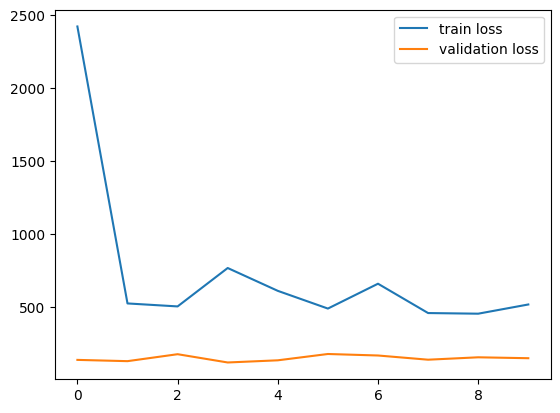

In [4]:
# model = LogisticRegression(input_size=input_size, num_classes=10)
# model.to(device)
# al_loss, val_acc, optimizer, train_losses, val_losses, train_accuracies, val_accuracies  = train_model(model, num_epochs=10, device=device)
# # model, optimizer, epoch, loss, file_path
# # plot the loss and accuracy
# plt.figure()
# plt.plot(train_losses, label='train loss')
# plt.plot(val_losses, label='validation loss')
# plt.legend()
# plt.show()
# # save_model(model,optimizer , num_epochs, val_loss, "./models/logistic_regression.pth", val_acc)

In [5]:



# model = FullyConnected(input_size, 128 , 256 , num_classes)
# model.to(device)
# val_loss , val_acc, optimizer  = train_model(model, num_epochs=num_epochs, device=device)
# # model, optimizer, epoch, loss, file_path
# save_model(model,optimizer , num_epochs, val_loss, "./models/fully_connected.pth", val_acc)



Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train Loss=126.4217, Train Accuracy=0.2552
Epoch 1: Val Loss=29.8909, Val Accuracy=0.3060
✅ Model saved to ./models/fully_connected.pth


In [7]:
# model = CNN(num_classes)
# model.to(device)
# val_loss , val_acc, optimizer  = train_model(model, num_epochs=num_epochs, device=device)
# # model, optimizer, epoch, loss, file_path
# save_model(model,optimizer , num_epochs, val_loss, "./models/CNN.pth", val_acc)

In [8]:
# model = MobileNetV2FeatureExtractor(num_classes)
# model.to(device)
# val_loss , val_acc, optimizer  = train_model(model, num_epochs=num_epochs, device=device)
# # model, optimizer, epoch, loss, file_path
# save_model(model,optimizer , num_epochs, val_loss, "./models/MobileNetV2FeatureExtractor.pth", val_acc)

In [9]:

# model = MobileNetV2FineTuned(num_classes)
# model.to(device)
# val_loss , val_acc, optimizer  = train_model(model, num_epochs=num_epochs, device=device)
# # model, optimizer, epoch, loss, file_path
# save_model(model,optimizer , num_epochs, val_loss, "./models/MobileNetV2FineTuned.pth", val_acc)



In [10]:

def train_with_variations(classToTrain, num_epochs, device , name_file, *args):
    learning_rates = [0.001, 0.01]
    weight_decay = [0, 0.0001]
    for lr in learning_rates:
        for wd in weight_decay:
            file_name = f"./models/{name_file}_lr_{lr}_wd_{wd}.pth"
            if os.path.exists(file_name):
                continue
            model = classToTrain(*args)
            model.to(device)
            val_loss , val_acc, optimizer, train_losses, val_losses, train_accuracies, val_accuracies  = train_model(model, num_epochs=num_epochs, device=device, learning_rate=lr, batch_size=64, weight_decay=wd)
            # model, optimizer, epoch, loss, file_path
            save_model(model,optimizer , file_name
                       ,acc=val_acc, train_losses=train_losses,val_losses=val_losses, train_accuracies=train_accuracies, val_accuracies=val_accuracies
                       ,epochs=num_epochs, loss=val_loss, lr=lr, wd=wd)


In [11]:
train_with_variations(LogisticRegression, num_epochs, device, "logistic_regression" , input_size, num_classes)
train_with_variations(FullyConnected, num_epochs, device, "fully_connected", input_size, 128, 256, num_classes)
train_with_variations(CNN, num_epochs, device, "CNN" , num_classes)
train_with_variations(MobileNetV2FeatureExtractor, num_epochs, device, "MobileNetV2FeatureExtractor", num_classes)
train_with_variations(MobileNetV2FineTuned, num_epochs, device, "MobileNetV2FineTuned", num_classes)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train Loss=164.0620, Train Accuracy=0.2062
Epoch 1: Val Loss=32.2402, Val Accuracy=0.3000
Epoch 2: Train Loss=133.4623, Train Accuracy=0.2657
Epoch 2: Val Loss=32.5996, Val Accuracy=0.2670
Epoch 3: Train Loss=130.1632, Train Accuracy=0.2807
Epoch 3: Val Loss=35.7972, Val Accuracy=0.2660
Epoch 4: Train Loss=128.2757, Train Accuracy=0.2965
Epoch 4: Val Loss=31.6977, Val Accuracy=0.2970
Epoch 5: Train Loss=131.2090, Train Accuracy=0.2858
Epoch 5: Val Loss=34.6424, Val Accuracy=0.2790
Epoch 6: Train Loss=126.7855, Train Accuracy=0.3035
Epoch 6: Val Loss=33.0132, Val Accuracy=0.2670
Epoch 7: Train Loss=125.6087, Train Accuracy=0.3103
Epoch 7: Val Loss=32.7423, Val Accuracy=0.3060
Epoch 8: Train Loss=129.7368, Train Accuracy=0.3130
Epoch 8: Val Loss=33.2026, Val Accuracy=0.2820
Epoch 9: Train Loss=130.9492, Train Accuracy=0.3028
Epoch 9: Val Loss=34.4191, Val Accuracy=0.2920
Epoch 10: Train Loss=132.3995, Tr

KeyboardInterrupt: 

NameError: name 'model' is not defined